# Matplotlib
Pandas documentation: http://matplotlib.org/contents.html

Matploblib can be used for creating plots and charts.

### Caution
Matplotlib의 sub-module인 pyplot을 **Windows**환경에서 구성하는 데에 문제가 있습니다. (이외에 Linux(especially Ubuntu)와 OS X에서는 문제가 없음을 확인하였습니다.)

이를 해결하기 위해서는 {your anaconda directory}\Lib\site-packages\matplotlib\font_manager.py를 수정해야 합니다. font_manager.py 내에 `win32InstalledFonts()` 함수 안의 내용 중에 일부를 다음과 같이 바꾸어야 합니다.


```{.python}
key, direc, any = winreg.EnumValue( local, j)
if not is_string_like(direc):
    continue
if not os.path.dirname(direc):
    direc = os.path.join(directory, direc)
direc = direc.split('\0', 1)[0]
```


저의 경우에는 `direc = os.path.abspath(direc).lower()`를 `direc = direc.split('\0', 1)[0]`로 변경하여 문제를 해결하였습니다.

참고한 글은 http://stackoverflow.com/a/34007642 입니다.

## 0. Basic

The library is generally used as follows:

- Call a plotting function with some data (e.g., plot())
- Call many functions to setup the properties of the plot (e.g., labes ald colors)
- Make the plot visible (e.g., show())

In [1]:
# matplotlib의 결과물을 notebook에 바로 띄우기 위한 문구
%matplotlib inline

# import packages
# 여기에서는 matplotlib의 submodule인 pyplot을 주로 활용
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

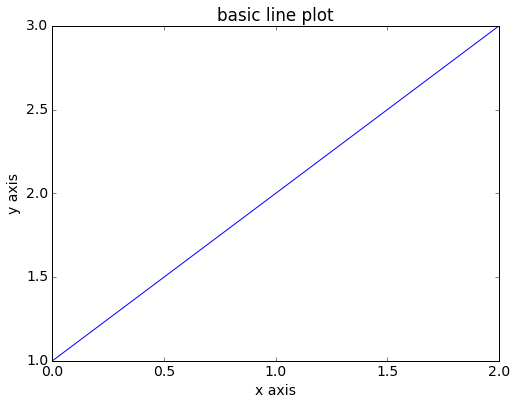

In [2]:
# basic line plot
myarray = np.array([1,2,3])
plt.plot(myarray)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('basic line plot')
plt.show()

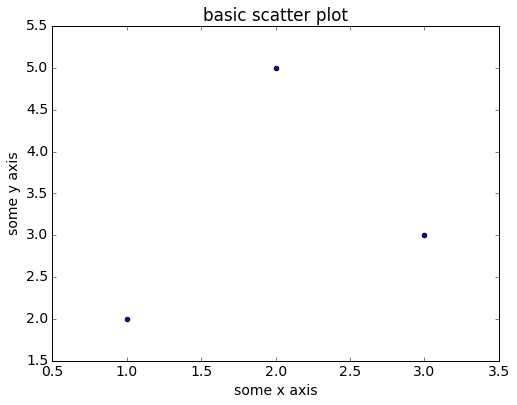

In [3]:
# basic scatter plot
x = np.array([1, 2, 3])
y = np.array([2, 5, 3])
plt.scatter(x,y)
plt.xlabel('some x axis')
plt.ylabel('some y axis')
plt.title('basic scatter plot')
plt.show()

## 1. Histogram
Purpose: Showing the distribution of a numerical variable

In [4]:
# Example data: Drinks data
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

In [5]:
drinks.head(5)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [6]:
# sort the beer column and mentally split it into 3 groups
drinks.beer.order().values

C:\Users\student\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   1,   1,   2,   3,   5,   5,   5,   5,   5,
         6,   6,   6,   6,   8,   8,   8,   9,   9,   9,   9,  12,  13,
        15,  15,  16,  16,  17,  18,  19,  19,  20,  20,  21,  21,  21,
        21,  22,  23,  25,  25,  25,  25,  26,  28,  31,  31,  31,  31,
        32,  32,  34,  36,  36,  36,  37,  42,  42,  43,  44,  45,  47,
        49,  51,  51,  52,  52,  52,  53,  56,  56,  57,  58,  60,  62,
        62,  63,  64,  69,  71,  76,  76,  77,  77,  77,  78,  79,  82,
        82,  85,  88,  89,  90,  92,  93,  93,  98,  99, 102, 105, 106,
       109, 111, 115, 120, 122, 124, 127, 128, 130, 133, 140, 142, 143,
       144, 147, 149, 149, 152, 157, 159, 162, 163, 167, 169, 171, 173,
       185, 188, 192, 193, 193, 194, 194, 196, 197, 199, 203, 206, 213,
       217, 219, 224, 224, 225, 230, 231, 233, 234, 236, 238, 240, 245,
       245, 247, 249, 251, 261, 263, 263, 270, 279, 281, 283, 28

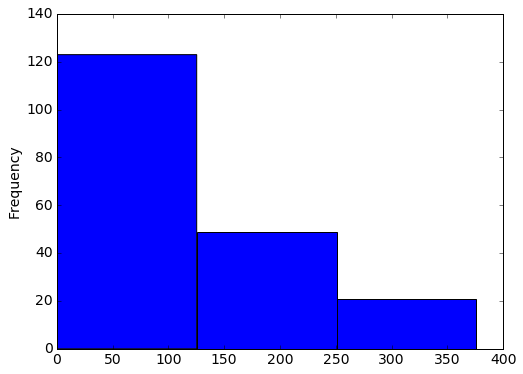

In [7]:
# compare with histogram
drinks.beer.plot(kind='hist', bins=3)

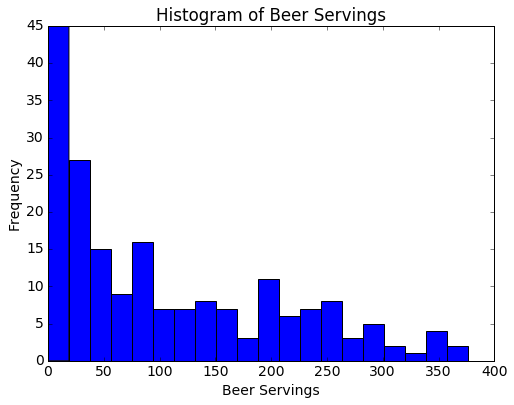

In [8]:
# try more bins
# add title and labels
drinks.beer.plot(kind='hist', bins=20)
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.title('Histogram of Beer Servings')

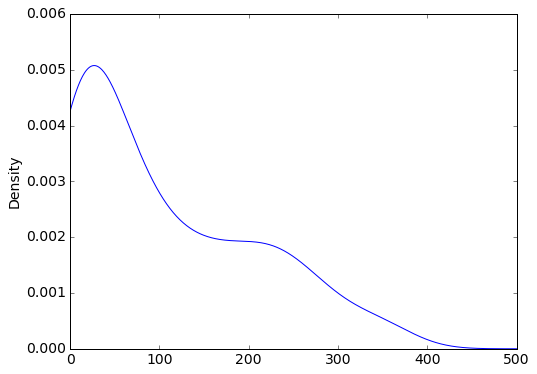

In [9]:
# compare with density plot (smooth version of a histogram)
drinks.beer.plot(kind='density', xlim=(0, 500))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BA030F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000BDC83C8>]], dtype=object)

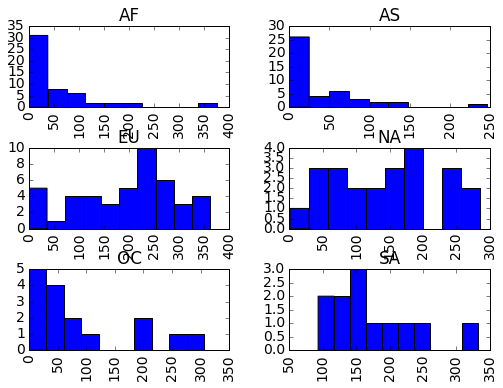

In [10]:
# histogram of beer servings grouped by continent
drinks.hist(column='beer', by='continent')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C145828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C2D03C8>]], dtype=object)

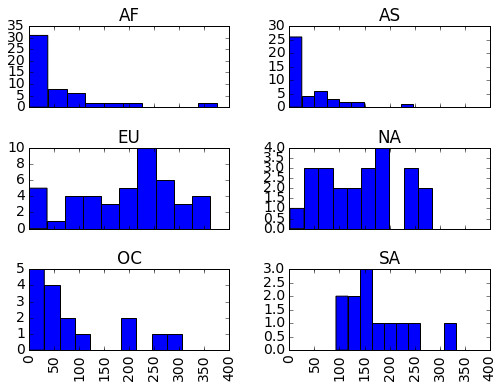

In [11]:
# share the x axes
drinks.hist(column='beer', by='continent', sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C4AC9B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D615278>]], dtype=object)

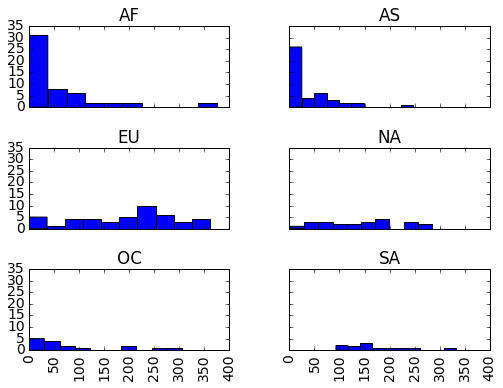

In [12]:
# share the x and y axes
drinks.hist(column='beer', by='continent', sharex=True, sharey=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D6CBD30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D9ABC88>]], dtype=object)

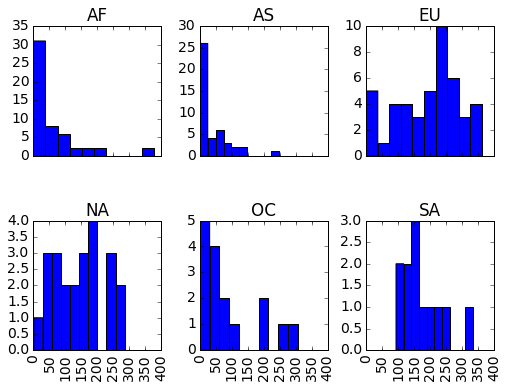

In [13]:
# change the layout
drinks.hist(column='beer', by='continent', sharex=True, layout=(2, 3))

## 2. Scatter plot
Purpose: Showing the relationship between two numerical variables

In [14]:
# select the beer and wine columns and sort by beer
drinks[['beer', 'wine']].sort('beer').values

C:\Users\student\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


array([[  0,   0],
       [  0,  74],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  1,   7],
       [  1,   1],
       [  1,   4],
       [  1,   1],
       [  2,   0],
       [  3,   1],
       [  5,   0],
       [  5,   0],
       [  5,  16],
       [  5,   1],
       [  5,   0],
       [  6,   1],
       [  6,   0],
       [  6,   1],
       [  6,   9],
       [  8,   0],
       [  8,   1],
       [  8,   1],
       [  9,   2],
       [  9,   0],
       [  9,   7],
       [  9,   0],
       [ 12,  10],
       [ 13,   0],
       [ 15,   3],
       [ 15,   1],
       [ 16,   5],
       [ 16,   0],
       [ 17,   1],
       [ 18,   0],
       [ 19,  32],
       [ 19,   2],
       [ 20,   0],
       [ 20,  31],
       [ 21,  11],
       [ 21,  11],
       [ 21,   5],
       [ 21,

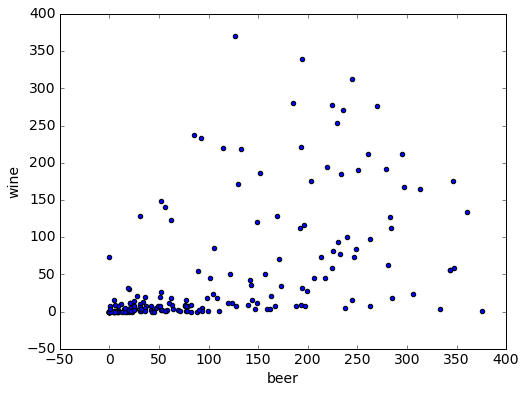

In [15]:
# compare with scatter plot
drinks.plot(kind='scatter', x='beer', y='wine')

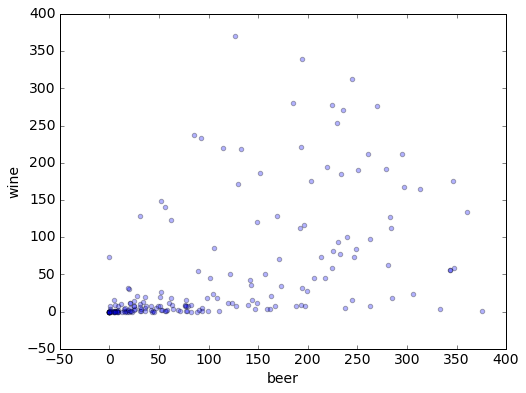

In [16]:
# add transparency
drinks.plot(kind='scatter', x='beer', y='wine', alpha=0.3)

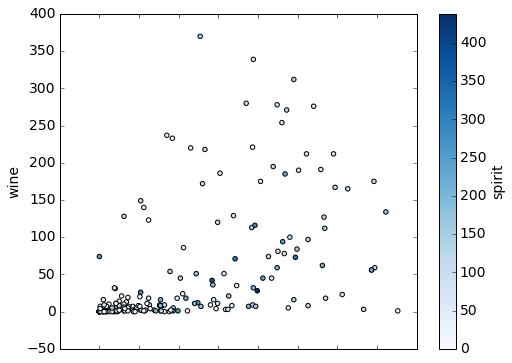

In [17]:
# vary point color by spirit servings
drinks.plot(kind='scatter', x='beer', y='wine', c='spirit', colormap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DD3ED30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DF95B00>]], dtype=object)

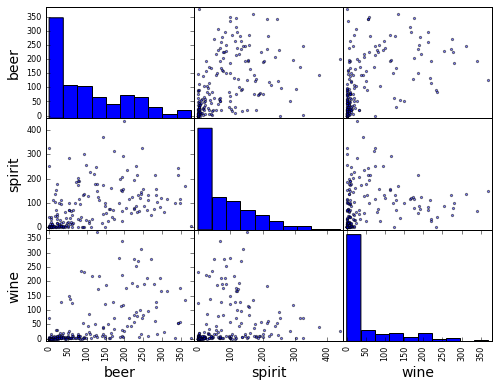

In [18]:
# scatter matrix of three numerical columns
pd.scatter_matrix(drinks[['beer', 'spirit', 'wine']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E027A58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F2E7748>]], dtype=object)

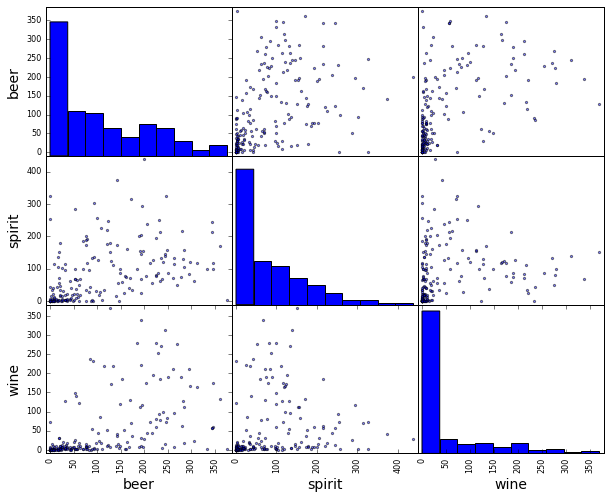

In [19]:
# increase figure size
pd.scatter_matrix(drinks[['beer', 'spirit', 'wine']], figsize=(10, 8))

## 3. Bar plot
Purpose: Showing a numerical comparison across different categories

In [20]:
# count the number of countries in each continent
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

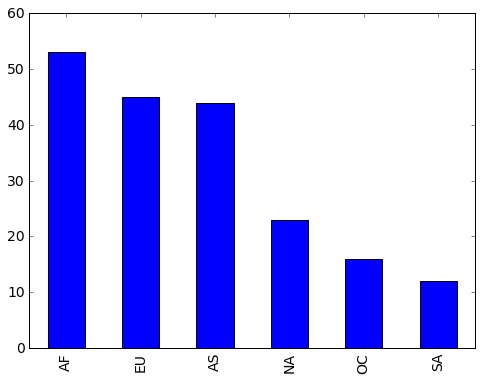

In [21]:
# compare with bar plot
drinks.continent.value_counts().plot(kind='bar')

In [22]:
# calculate the mean alcohol amounts for each continent
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


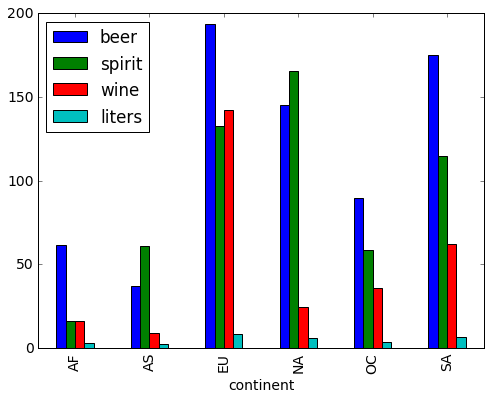

In [23]:
# side-by-side bar plots
drinks.groupby('continent').mean().plot(kind='bar')

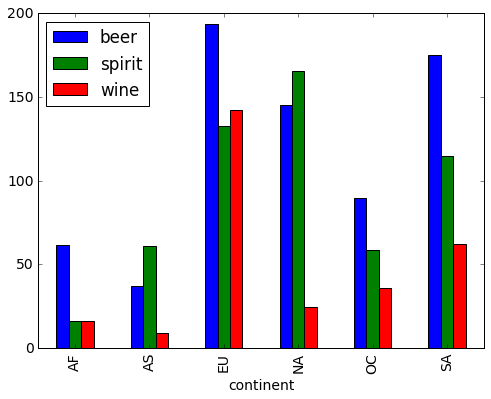

In [24]:
# drop the liters column
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar')

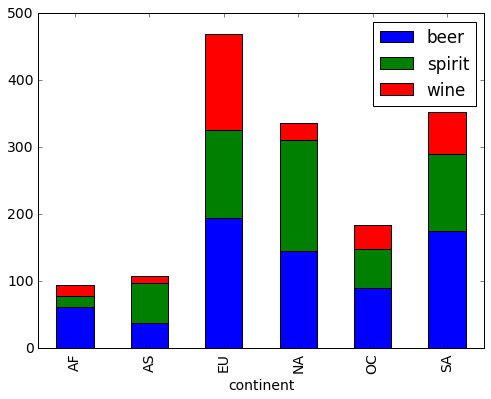

In [25]:
# stacked bar plots
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=True)

## 4. Box plot
Purpose: Showing quartiles and outliers for one or more numerical variables

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(More useful than mean and standard deviation for describing skewed distributions)

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

In [26]:
# sort the spirit column
drinks.spirit.order().values

C:\Users\student\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   2,   2,   2,   2,   2,   2,
         3,   3,   3,   3,   3,   3,   3,   3,   4,   4,   4,   5,   5,
         6,   6,   6,   7,   9,  11,  11,  12,  13,  15,  15,  16,  16,
        18,  18,  18,  18,  19,  21,  21,  22,  22,  25,  25,  27,  29,
        31,  31,  34,  35,  35,  35,  35,  38,  39,  41,  41,  42,  42,
        44,  46,  50,  51,  55,  56,  57,  60,  61,  63,  63,  65,  67,
        68,  69,  69,  69,  71,  71,  72,  74,  75,  76,  76,  79,  81,
        84,  87,  87,  88,  97,  97,  98,  98, 100, 100, 100, 100, 101,
       104, 104, 112, 114, 114, 114, 117, 117, 118, 118, 122, 122, 124,
       126, 128, 131, 132, 133, 133, 135, 137, 138, 145, 147, 151, 152,
       154, 156, 157, 158, 160, 170, 173, 173, 176, 178, 179, 186, 189,
       192, 194, 200, 202, 205, 215, 215, 216, 221, 226, 237, 24

In [27]:
# show "five-number summary" for spirit
drinks.spirit.describe()

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit, dtype: float64

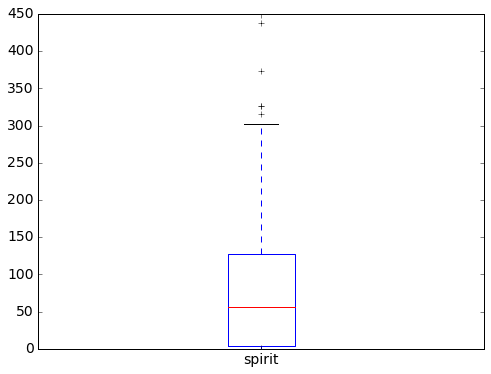

In [28]:
# compare with box plot
drinks.spirit.plot(kind='box')

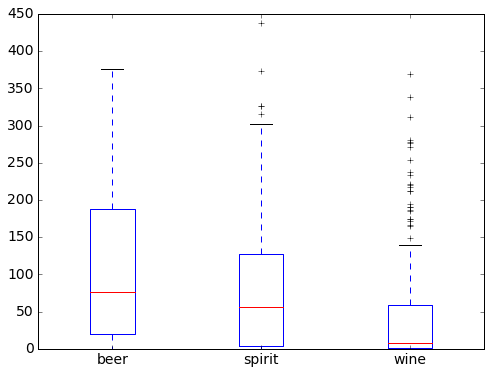

In [29]:
# include multiple variables
drinks.drop('liters', axis=1).plot(kind='box')

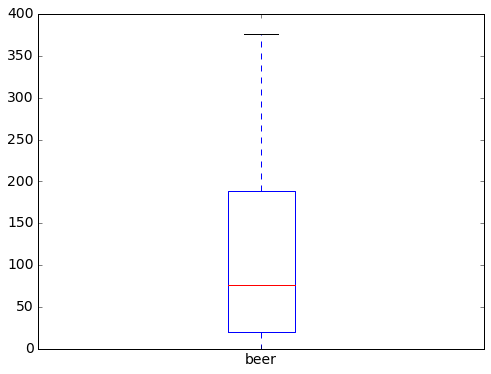

In [30]:
# reminder: box plot of beer servings
drinks.beer.plot(kind='box')

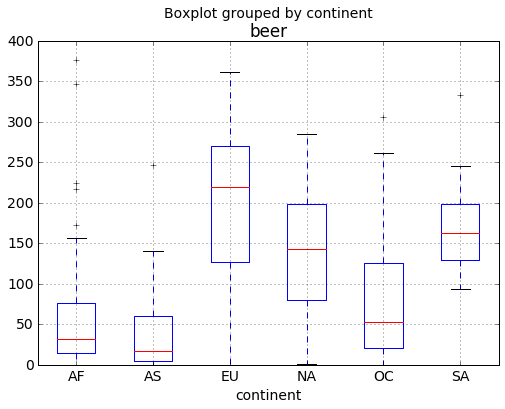

In [31]:
# box plot of beer servings grouped by continent
drinks.boxplot(column='beer', by='continent')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010A7F860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010B4D9E8>]], dtype=object)

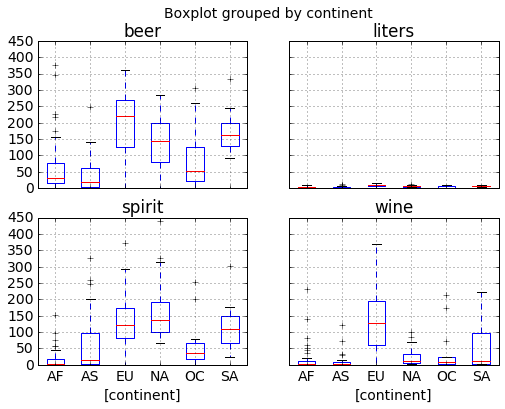

In [32]:
# box plot of all numeric columns grouped by continent
drinks.boxplot(by='continent')

## 5. Line plot
Purpose: Showing the trend of a numerical variable over time

In [33]:
# read in the ufo data
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/ufo.csv'
ufo = pd.read_csv(url)
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year

In [34]:
# count the number of ufo reports each year (and sort by year)
ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
1936       2
1937       2
1939       3
1941       2
1942       3
1943       5
1944       8
1945       9
1946       8
1947      41
1948       9
1949      19
1950      31
1951      21
1952      52
1953      36
1954      55
1955      33
1956      46
1957      78
1958      53
1959      57
1960      67
1961      50
1962      72
        ... 
1985     211
1986     186
1987     210
1988     232
1989     247
1990     237
1991     220
1992     245
1993     292
1994     406
1995    1344
1996     851
1997    1237
1998    1743
1999    2774
2000    2635
2001    2925
2002    2933
2003    3507
2004    3850
2005    3787
2006    3445
2007    4058
2008    4655
2009    4251
2010    4154
2011    5089
2012    7263
2013    7003
2014    5382
Name: Year, dtype: int64

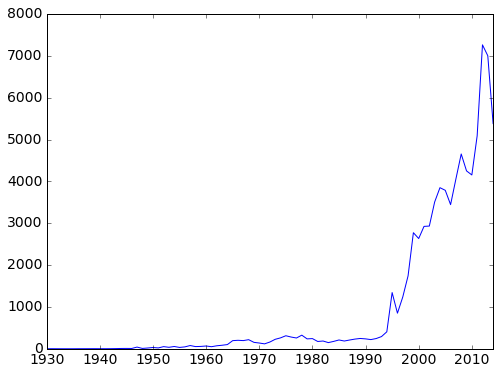

In [35]:
# compare with line plot
ufo.Year.value_counts().sort_index().plot()

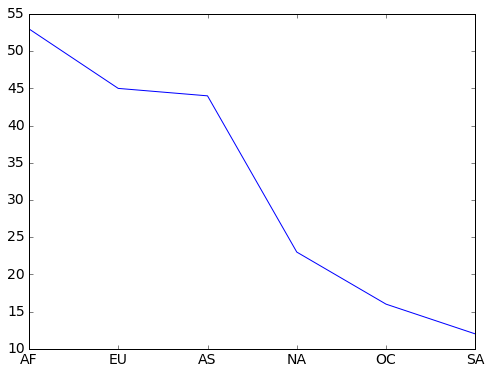

In [36]:
# don't use a line plot when there is no logical ordering
drinks.continent.value_counts().plot()

## 6. Saving a plot and Changing a style

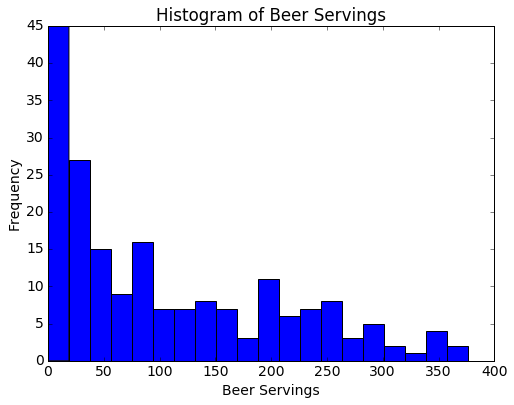

In [37]:
# saving a plot to a file
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.savefig('beer_histogram_original.png')

In [38]:
# list available plot styles
plt.style.available

['seaborn-pastel',
 'fivethirtyeight',
 'ggplot',
 'seaborn-deep',
 'seaborn-dark-palette',
 'bmh',
 'seaborn-notebook',
 'seaborn-poster',
 'seaborn-whitegrid',
 'seaborn-darkgrid',
 'dark_background',
 'seaborn-talk',
 'classic',
 'seaborn-paper',
 'seaborn-dark',
 'seaborn-white',
 'grayscale',
 'seaborn-bright',
 'seaborn-ticks',
 'seaborn-muted',
 'seaborn-colorblind']

In [39]:
# change to a different style
plt.style.use('ggplot')

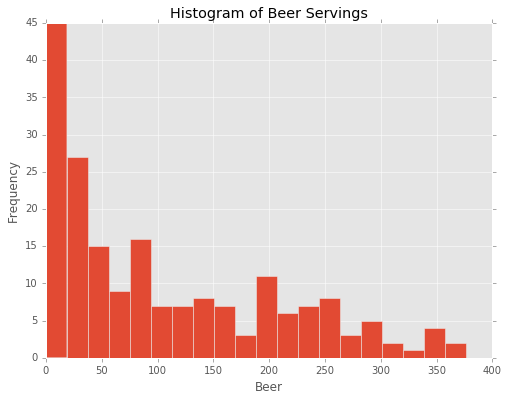

In [40]:
# saving a plot to a file
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer')
plt.ylabel('Frequency')
plt.savefig('beer_histogram_ggplot.png')

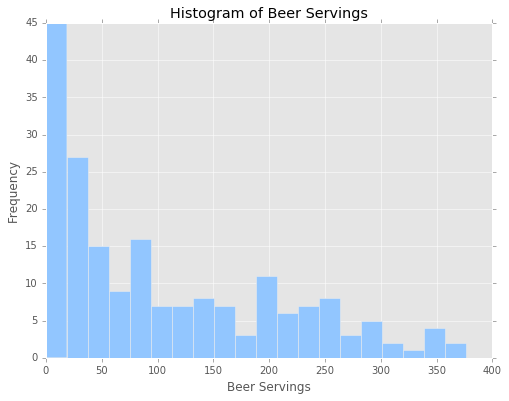

In [41]:
# Other example
plt.style.use('seaborn-pastel')
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.savefig('beer_histogram_seaborn.png')

# 7. Style

**Marker**:
- http://matplotlib.org/1.5.1/examples/lines_bars_and_markers/marker_reference.html
- http://matplotlib.org/api/markers_api.html

**Line**:
- http://matplotlib.org/1.5.1/examples/lines_bars_and_markers/line_styles_reference.html
- http://matplotlib.org/api/lines_api.html

**Color**:
- http://matplotlib.org/examples/color/named_colors.html
- http://matplotlib.org/api/colors_api.html


In [42]:
from IPython.display import Image

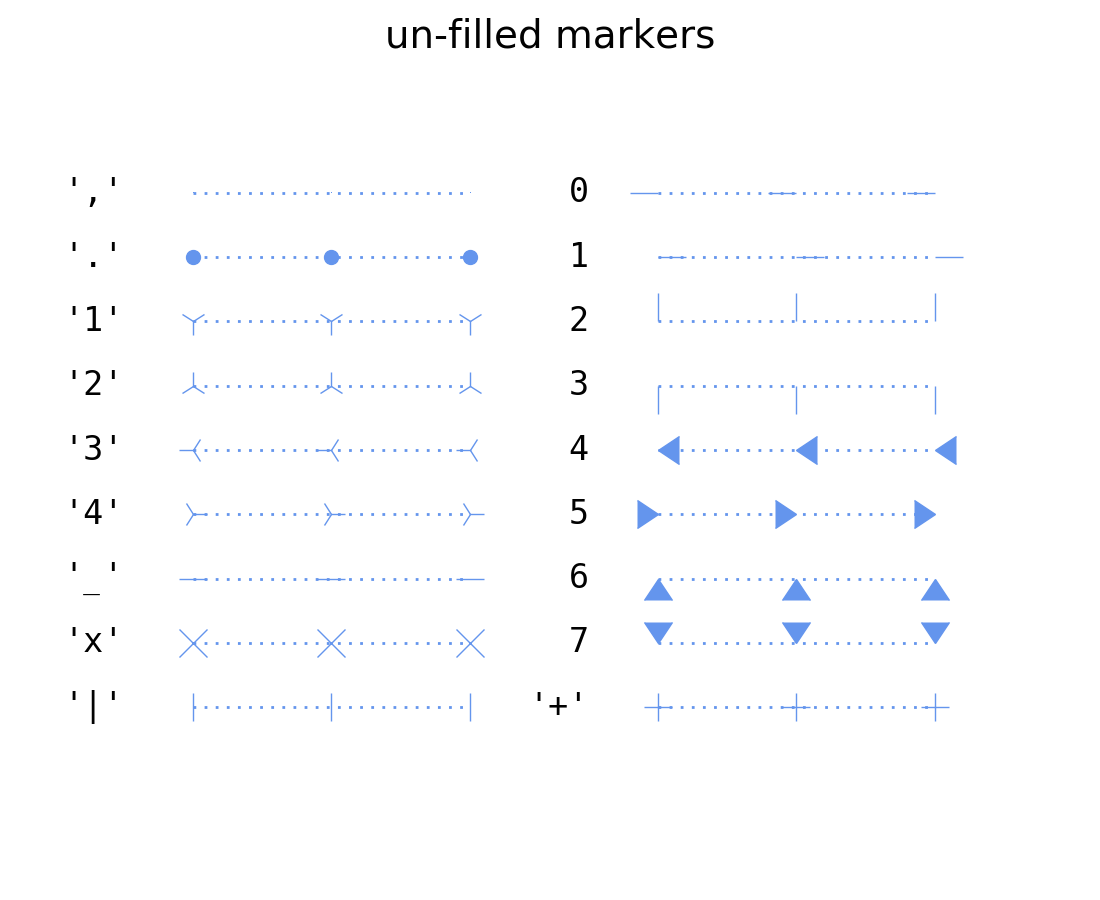

In [43]:
Image(filename="marker_reference_00.png")

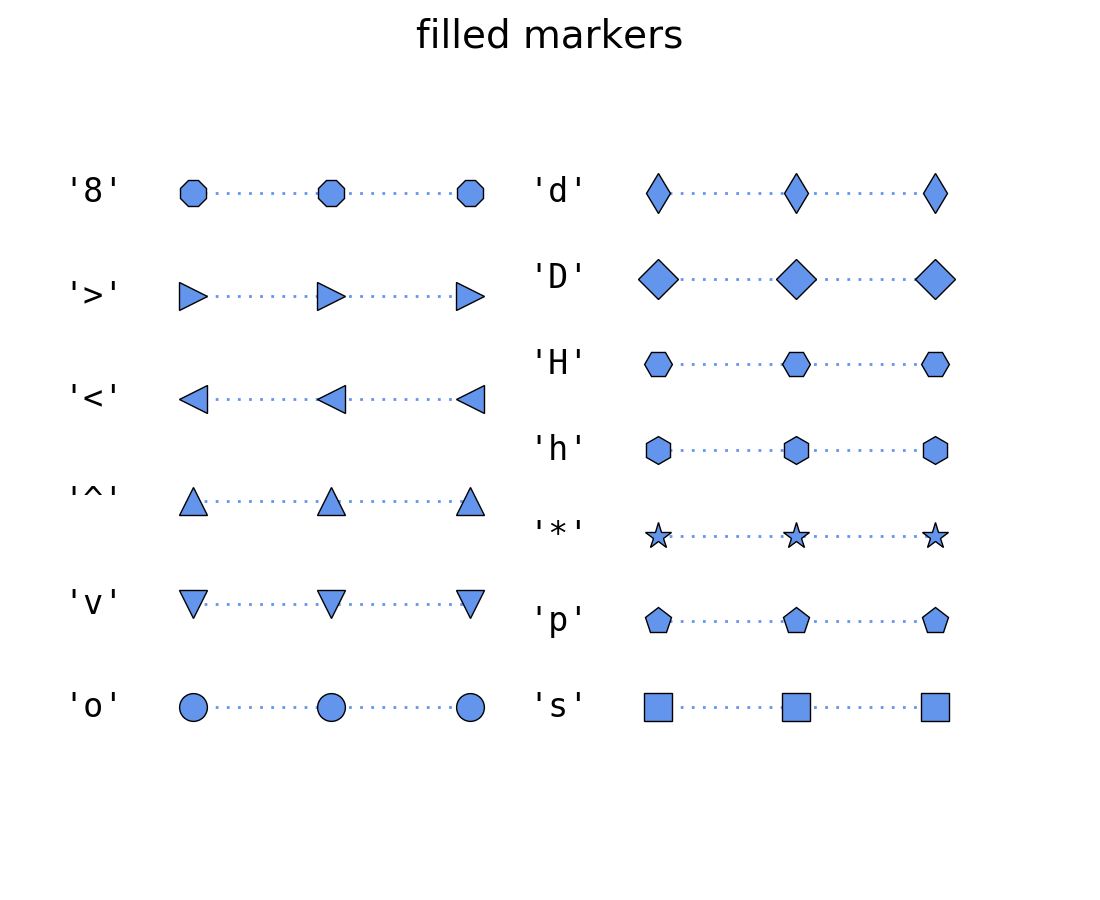

In [44]:
Image(filename="marker_reference_01.png")

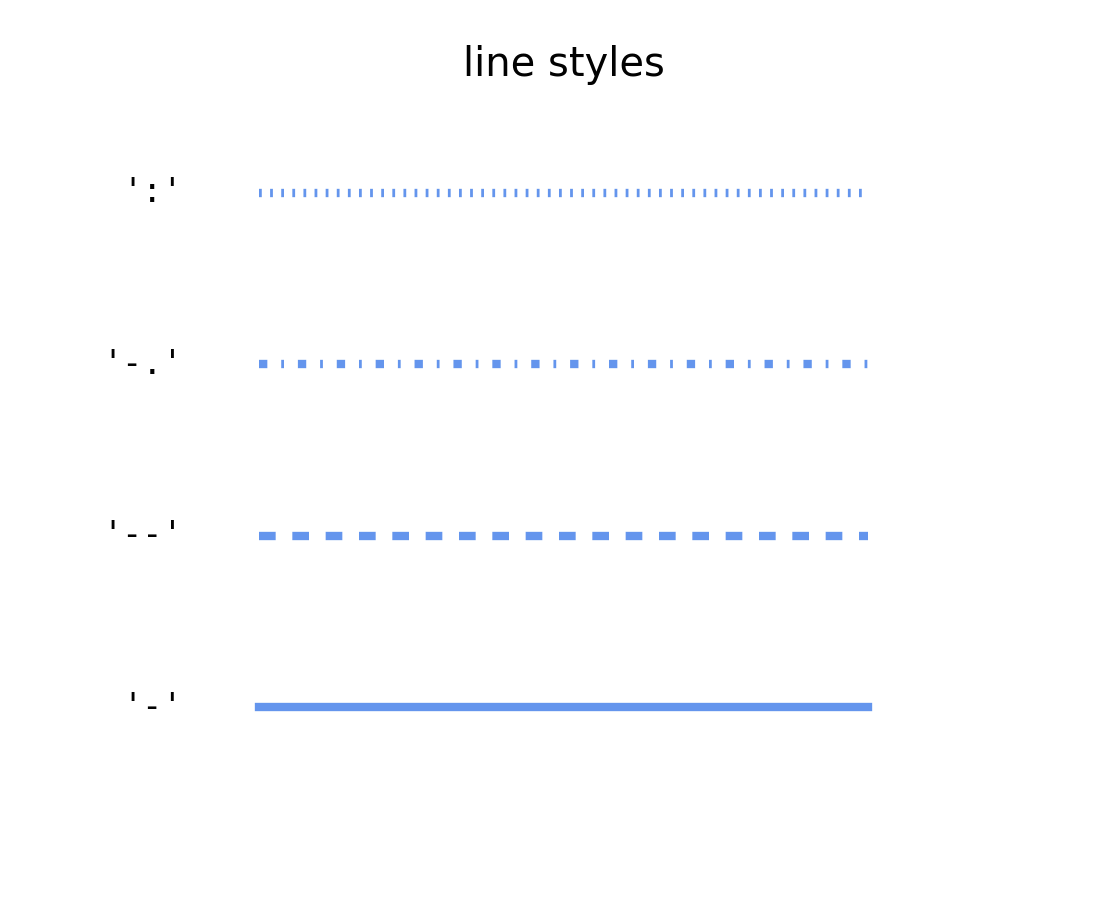

In [45]:
Image(filename="line_styles_reference.png")

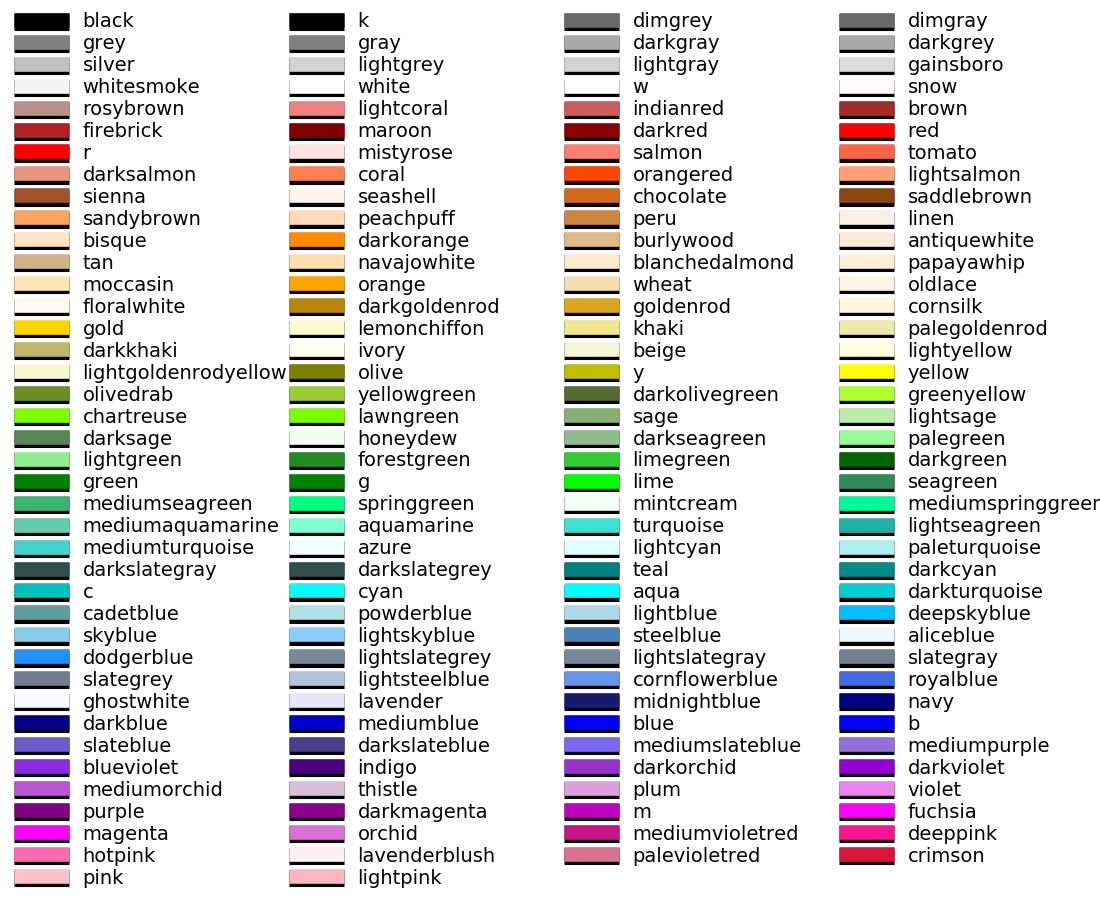

In [46]:
Image(filename="named_colors.png")

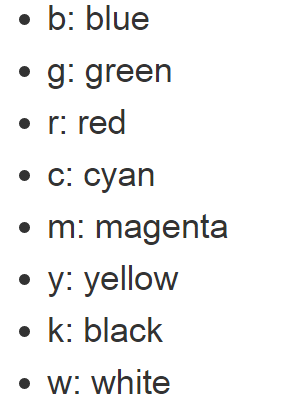

In [47]:
Image(filename="named_colors_brief.png")

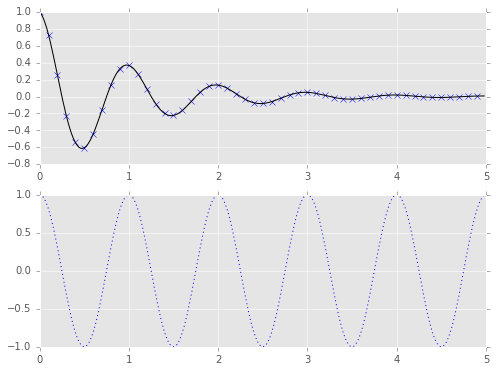

In [48]:
# from http://matplotlib.org/users/pyplot_tutorial.html
# 자유롭게 변형해보면서 그림을 수정해보시오.

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bx', t2, f(t2), 'k') # 'ro': 빨간색 동그라미, 'k': 검은색

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'b:') # 'r--': 빨간색 점선
plt.show()